In [451]:
import pandas as pd


In [452]:
orders = pd.read_excel('Data.xlsx')

In [453]:
orders.head()


,order_id,order_date,customer_id,customer,grand_total
0,2793379,2018-08-16 00:20:43.717,39052,مطلق پیروز فرهاد,2193200.0
1,2440261,2018-05-15 10:08:40.137,886,اخباری هادی,474800.0
2,2353772,2018-04-17 16:58:15.133,73612,محمدرضا کسرائی,435580.0
3,3424272,2019-01-24 02:16:59.197,79882,حسین یعقوبیان,91927.0
4,3455576,2019-02-03 17:52:16.860,23361,فریدحسینی فرهاد,110075.0


In [454]:
import datetime as dt
NOW = dt.datetime.now()

In [455]:
# Make the date_placed column datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [456]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum(),
                                        'customer_id': lambda x: x.max()                  
                                          }) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary'}, inplace=True)



In [457]:
rfmTable.head()

,recency,frequency,monetary,customer_id
customer,,,,
سندگل غلامرضا,56,7,4343665.0,33608
اسکندانی محمدامین,53,9,3014658.0,33308
شجاعی سید عباس,139,12,1371400.0,89707
آبادیان شریف آباد هوشنگ,69,1,292275.0,52743
آبیان محمدرضا,70,1,442275.0,41788


In [458]:
quantiles = rfmTable.quantile(q=[0.2,0.4,0.6,0.8])


In [459]:
quantiles


,recency,frequency,monetary,customer_id
0.2,55.0,1.0,337285.0,31195.2
0.4,87.0,2.0,1199900.0,53736.8
0.6,150.0,4.0,4235503.2,89307.2
0.8,244.0,17.0,19569281.2,110194.2


In [460]:
quantiles = quantiles.to_dict()


In [461]:
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1

In [462]:
rfmSegmentation = rfmTable


In [463]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary'].apply(FMClass, args=('monetary',quantiles,))


In [464]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation['RFMScore'] = rfmSegmentation.R_Quartile \
                            + rfmSegmentation.F_Quartile \
                            + rfmSegmentation.M_Quartile


| نوع مشتری          | RFM | شرح                                                 |
|--------------------|-----|-----------------------------------------------------|
| بهترین مشتریان     | 111 | اخیرا و اغلب خریداری شده است و بیشترین مصرف را دارد |
| مشتریان وفادار     | X1X | اغلب میخرند                                         |
| مصرف کنندگان بالا  | XX1 | هزینه زیادی صرف خرید میکنند                         |
| تقریبا از دست رفته | 311 | خیلی وقته خرید نکردند ولی قبلا خرید خوبی داشتند     |
| از دست رفته        | 411 | خیلی وقته خرید نکردند ولی قبلا خرید خوبی داشتند     |
| کم خرید گذری       | 444 | خیلی کم  و با فاصله خرید کردند                      |

In [465]:

rfmSegmentation[rfmSegmentation['RFMClass']=='111'].head(10)

,recency,frequency,monetary,customer_id,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
customer,,,,,,,,,
آخوندپورمنطقی علی,48,26,2.806270e+07,90358,1,1,1,111,3
آخوندیان یزد جواد,46,54,1.715146e+08,85066,1,1,1,111,3
آذر فانی پاکدل,46,315,2.597221e+09,94954,1,1,1,111,3
آرش آذری پور,54,38,6.090688e+07,16240,1,1,1,111,3
آرش پیوندی یزدی,46,38,3.154838e+07,94533,1,1,1,111,3
آرمند حسین,53,18,2.073102e+07,87213,1,1,1,111,3
آزاده شیرین زاده,48,59,2.494071e+07,112747,1,1,1,111,3
آزیتا گنجی,50,166,7.723808e+08,42281,1,1,1,111,3
آصفی رحیم,46,177,2.545392e+08,19705,1,1,1,111,3


In [466]:
RFMClassGrp=rfmSegmentation.groupby("RFMClass")
RFMClassGrp.head(5)


,recency,frequency,monetary,customer_id,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
customer,,,,,,,,,
سندگل غلامرضا,56,7,4.343665e+06,33608,2,2,2,222,6
اسکندانی محمدامین,53,9,3.014658e+06,33308,1,2,3,123,6
شجاعی سید عباس,139,12,1.371400e+06,89707,3,2,3,323,8
آبادیان شریف آباد هوشنگ,69,1,2.922750e+05,52743,2,5,5,255,12
آبیان محمدرضا,70,1,4.422750e+05,41788,2,5,4,254,11
آتنا آقا کشمیری,109,7,5.127462e+06,110998,3,2,2,322,7
آتنا آقاکشمیری,65,60,1.955707e+07,109802,2,1,2,212,5
آتنا سادات,85,10,2.970130e+06,109884,2,2,3,223,7
آتنا پورعلی,89,35,2.493364e+07,112402,3,1,1,311,5


In [467]:
rfmSegmentation.groupby('RFMScore').agg({'recency': 'mean','frequency': 'mean','monetary': ['mean','count'] }).round(1)

recency frequency     monetary      
            mean      mean         mean count
RFMScore                                     
3           48.1     194.2  564862103.1   873
4           58.3      36.6   53039159.0   483
5           66.5      22.3   27027947.4   469
6           83.7      17.8   31106114.1   518
7          103.5      10.3   14957011.9   506
8          122.8       6.0    8205091.3   524
9          128.3       3.7    7148857.8   502
10         138.6       2.5    3959002.3   546
11         148.5       1.7    4019755.5   721
12         176.9       1.4    1857198.5   815
13         216.0       1.2     892978.0   901
14         247.8       1.0     367159.3   811
15         315.1       1.0     167648.0   514

In [468]:
# Define rfm_level function
def rfm_level(df):
    if df['RFMScore'] >= 14:
        return 'درجه 5'
    elif ((df['RFMScore'] >= 11) and (df['RFMScore'] < 14)):
        return 'درجه 4'
    elif ((df['RFMScore'] >= 8) and (df['RFMScore'] < 11)):
        return 'درجه 3'
    elif ((df['RFMScore'] >= 5) and (df['RFMScore'] < 8)):
          return 'درجه 2'
    else:
        return 'درجه 1'

In [469]:
# Create a new variable RFM_Level
rfmSegmentation['rfmlevel'] = rfmSegmentation.apply(rfm_level, axis=1)

rfmSegmentation.head(5)

,recency,frequency,monetary,customer_id,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,rfmlevel
customer,,,,,,,,,,
سندگل غلامرضا,56,7,4343665.0,33608,2,2,2,222,6,درجه 2
اسکندانی محمدامین,53,9,3014658.0,33308,1,2,3,123,6,درجه 2
شجاعی سید عباس,139,12,1371400.0,89707,3,2,3,323,8,درجه 3
آبادیان شریف آباد هوشنگ,69,1,292275.0,52743,2,5,5,255,12,درجه 4
آبیان محمدرضا,70,1,442275.0,41788,2,5,4,254,11,درجه 4


In [470]:
rfmSegmentation.groupby('rfmlevel').agg({'recency': 'mean','frequency': 'mean','monetary': ['mean','sum','count'] }).round(1)

recency frequency     monetary                    
            mean      mean         mean           sum count
rfmlevel                                                   
درجه 1      51.7     138.0  382553488.1  5.187425e+11  1356
درجه 2      85.0      16.7   24351857.0  3.635732e+10  1493
درجه 3     130.0       4.1    6393008.7  1.004981e+10  1572
درجه 4     183.0       1.4    2140514.4  5.216434e+09  2437
درجه 5     273.9       1.0     289764.0  3.839373e+08  1325

In [471]:
rfm=rfmSegmentation[["R_Quartile","F_Quartile","M_Quartile"]]
#rfm=rfmSegmentation[["recency","frequency","monetary"]]
rfm.head()

,R_Quartile,F_Quartile,M_Quartile
customer,,,
سندگل غلامرضا,2,2,2
اسکندانی محمدامین,1,2,3
شجاعی سید عباس,3,2,3
آبادیان شریف آباد هوشنگ,2,5,5
آبیان محمدرضا,2,5,4


In [472]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(rfm)


In [484]:
#rfmTable['clusters'] = clusters
#rfmTable.sort_values("monetary",ascending=False)
rfmTable[rfmTable["clusters"]==3]

,recency,frequency,monetary,customer_id,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,rfmlevel,clusters
customer,,,,,,,,,,,
سندگل غلامرضا,56,7,4.343665e+06,33608,2,2,2,222,6,درجه 2,3
اسکندانی محمدامین,53,9,3.014658e+06,33308,1,2,3,123,6,درجه 2,3
آتنا آقاکشمیری,65,60,1.955707e+07,109802,2,1,2,212,5,درجه 2,3
آتنا پورعلی,89,35,2.493364e+07,112402,3,1,1,311,5,درجه 2,3
آخوندپورمنطقی علی,48,26,2.806270e+07,90358,1,1,1,111,3,درجه 1,3
آخوندیان یزد جواد,46,54,1.715146e+08,85066,1,1,1,111,3,درجه 1,3
آذر فانی پاکدل,46,315,2.597221e+09,94954,1,1,1,111,3,درجه 1,3
آذری سیمین,48,27,9.537102e+06,19635,1,1,2,112,4,درجه 1,3
آرزو نادری مقدم,117,123,7.830581e+07,112883,3,1,1,311,5,درجه 2,3


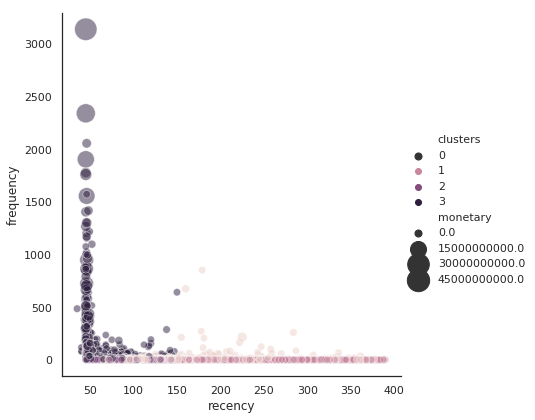

In [474]:
import seaborn as sns
sns.set(style="white")

sns.relplot(x="recency", y="frequency", hue="clusters", size="monetary",
            sizes=(50, 500), alpha=.5,
            height=6, data=rfmTable[rfmTable['frequency']<10000] )